In [12]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout, LSTM
from tensorflow.keras.models import Model

In [13]:
X1 = list()
X2 = list()

X = list()
y = list()

X1 = [(x+1)*4 for x in range(25)]
X2 = [(x+1)*5 for x in range(25)]

y = np.array([x1*x2 for x1, x2 in zip(X1,X2)])

X = np.column_stack((X1, X2))
print(X)
print(y)

[[  4   5]
 [  8  10]
 [ 12  15]
 [ 16  20]
 [ 20  25]
 [ 24  30]
 [ 28  35]
 [ 32  40]
 [ 36  45]
 [ 40  50]
 [ 44  55]
 [ 48  60]
 [ 52  65]
 [ 56  70]
 [ 60  75]
 [ 64  80]
 [ 68  85]
 [ 72  90]
 [ 76  95]
 [ 80 100]
 [ 84 105]
 [ 88 110]
 [ 92 115]
 [ 96 120]
 [100 125]]
[   20    80   180   320   500   720   980  1280  1620  2000  2420  2880
  3380  3920  4500  5120  5780  6480  7220  8000  8820  9680 10580 11520
 12500]


In [14]:
X = np.array(X).reshape(25, 1, 2)
X.shape

(25, 1, 2)

In [15]:
def create_lstm_one_to_one_model():
    input_layer = Input(shape=(1,2))
    lstm1 = LSTM(100, activation="relu", return_sequences=True)(input_layer)
    lstm2 = LSTM(50, activation="relu", return_sequences=True)(lstm1)
    lstm3 = LSTM(25, activation="relu")(lstm2)
    dense1 = Dense(10, activation="relu")(lstm3)
    output_layer = Dense(1)(dense1)
    model = Model(input_layer, output_layer)
    model.compile(loss="mse", optimizer='adam')
    return model

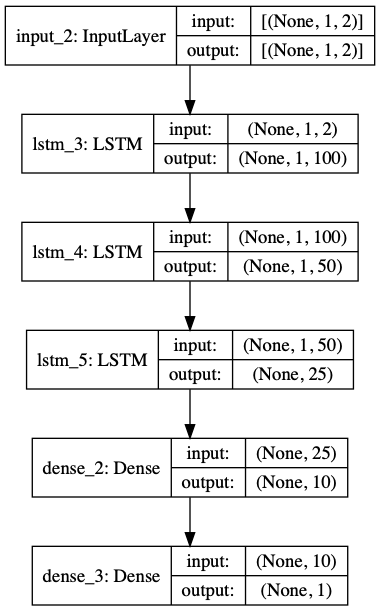

In [16]:
from tensorflow.keras.utils import plot_model
model = create_lstm_one_to_one_model()
plot_model(model, to_file="../images/model_lstm_plot1.png", show_shapes=True, show_layer_names=True)

In [17]:
model_history = model.fit(X, y, epochs=1000, verbose=1)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 34458500.0000
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 34457808.0000
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 34456936.0000
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 34456244.0000
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 34455388.0000
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 34454348.0000
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 34453140.0000
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 34451760.0000
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 34450104.0000
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 34448148.0000
Epoch 11/1000
1/1 [==============================] - 0s 3ms/step - loss: 34445860.0000
Epoch 12/1000
1/1 [==============================] - 

1/1 [==============================] - 0s 4ms/step - loss: 11949516.0000
Epoch 96/1000
1/1 [==============================] - 0s 4ms/step - loss: 11175080.0000
Epoch 97/1000
1/1 [==============================] - 0s 4ms/step - loss: 10408634.0000
Epoch 98/1000
1/1 [==============================] - 0s 4ms/step - loss: 9652107.0000
Epoch 99/1000
1/1 [==============================] - 0s 4ms/step - loss: 8907933.0000
Epoch 100/1000
1/1 [==============================] - 0s 4ms/step - loss: 8179399.0000
Epoch 101/1000
1/1 [==============================] - 0s 4ms/step - loss: 7470898.5000
Epoch 102/1000
1/1 [==============================] - 0s 5ms/step - loss: 6787901.0000
Epoch 103/1000
1/1 [==============================] - 0s 5ms/step - loss: 6140029.5000
Epoch 104/1000
1/1 [==============================] - 0s 5ms/step - loss: 5525956.5000
Epoch 105/1000
1/1 [==============================] - 0s 5ms/step - loss: 4953171.0000
Epoch 106/1000
1/1 [==============================] - 0s 5m

1/1 [==============================] - 0s 4ms/step - loss: 7028.6318
Epoch 190/1000
1/1 [==============================] - 0s 5ms/step - loss: 8777.5439
Epoch 191/1000
1/1 [==============================] - 0s 5ms/step - loss: 7098.9336
Epoch 192/1000
1/1 [==============================] - 0s 5ms/step - loss: 7098.5576
Epoch 193/1000
1/1 [==============================] - 0s 6ms/step - loss: 6975.0952
Epoch 194/1000
1/1 [==============================] - 0s 3ms/step - loss: 5726.6167
Epoch 195/1000
1/1 [==============================] - 0s 4ms/step - loss: 6649.8970
Epoch 196/1000
1/1 [==============================] - 0s 4ms/step - loss: 4918.6787
Epoch 197/1000
1/1 [==============================] - 0s 4ms/step - loss: 6237.3076
Epoch 198/1000
1/1 [==============================] - 0s 4ms/step - loss: 4506.9746
Epoch 199/1000
1/1 [==============================] - 0s 4ms/step - loss: 5281.2393
Epoch 200/1000
1/1 [==============================] - 0s 4ms/step - loss: 4415.9507
Epoch 2

1/1 [==============================] - 0s 4ms/step - loss: 745.9522
Epoch 287/1000
1/1 [==============================] - 0s 4ms/step - loss: 710.1316
Epoch 288/1000
1/1 [==============================] - 0s 4ms/step - loss: 704.4252
Epoch 289/1000
1/1 [==============================] - 0s 4ms/step - loss: 700.8032
Epoch 290/1000
1/1 [==============================] - 0s 3ms/step - loss: 643.9510
Epoch 291/1000
1/1 [==============================] - 0s 3ms/step - loss: 629.8243
Epoch 292/1000
1/1 [==============================] - 0s 3ms/step - loss: 694.5270
Epoch 293/1000
1/1 [==============================] - 0s 4ms/step - loss: 648.1842
Epoch 294/1000
1/1 [==============================] - 0s 4ms/step - loss: 629.4456
Epoch 295/1000
1/1 [==============================] - 0s 4ms/step - loss: 527.3853
Epoch 296/1000
1/1 [==============================] - 0s 6ms/step - loss: 2943.7153
Epoch 297/1000
1/1 [==============================] - 0s 3ms/step - loss: 7577.4419
Epoch 298/1000
1/

1/1 [==============================] - 0s 4ms/step - loss: 1011.0850
Epoch 384/1000
1/1 [==============================] - 0s 3ms/step - loss: 994.3737
Epoch 385/1000
1/1 [==============================] - 0s 3ms/step - loss: 979.8727
Epoch 386/1000
1/1 [==============================] - 0s 4ms/step - loss: 964.1613
Epoch 387/1000
1/1 [==============================] - 0s 4ms/step - loss: 950.3562
Epoch 388/1000
1/1 [==============================] - 0s 4ms/step - loss: 935.3745
Epoch 389/1000
1/1 [==============================] - 0s 4ms/step - loss: 922.2891
Epoch 390/1000
1/1 [==============================] - 0s 4ms/step - loss: 908.4097
Epoch 391/1000
1/1 [==============================] - 0s 3ms/step - loss: 895.9201
Epoch 392/1000
1/1 [==============================] - 0s 4ms/step - loss: 883.1289
Epoch 393/1000
1/1 [==============================] - 0s 5ms/step - loss: 871.6822
Epoch 394/1000
1/1 [==============================] - 0s 3ms/step - loss: 861.2820
Epoch 395/1000
1/1

1/1 [==============================] - 0s 4ms/step - loss: 337.2305
Epoch 482/1000
1/1 [==============================] - 0s 4ms/step - loss: 334.5480
Epoch 483/1000
1/1 [==============================] - 0s 3ms/step - loss: 332.0850
Epoch 484/1000
1/1 [==============================] - 0s 4ms/step - loss: 329.9659
Epoch 485/1000
1/1 [==============================] - 0s 3ms/step - loss: 328.3617
Epoch 486/1000
1/1 [==============================] - 0s 3ms/step - loss: 327.7307
Epoch 487/1000
1/1 [==============================] - 0s 4ms/step - loss: 328.7777
Epoch 488/1000
1/1 [==============================] - 0s 7ms/step - loss: 333.0160
Epoch 489/1000
1/1 [==============================] - 0s 3ms/step - loss: 343.0699
Epoch 490/1000
1/1 [==============================] - 0s 4ms/step - loss: 364.8033
Epoch 491/1000
1/1 [==============================] - 0s 4ms/step - loss: 408.0670
Epoch 492/1000
1/1 [==============================] - 0s 3ms/step - loss: 497.1757
Epoch 493/1000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 177.5112
Epoch 580/1000
1/1 [==============================] - 0s 4ms/step - loss: 177.0539
Epoch 581/1000
1/1 [==============================] - 0s 4ms/step - loss: 177.6971
Epoch 582/1000
1/1 [==============================] - 0s 3ms/step - loss: 177.4977
Epoch 583/1000
1/1 [==============================] - 0s 3ms/step - loss: 175.4796
Epoch 584/1000
1/1 [==============================] - 0s 3ms/step - loss: 172.3204
Epoch 585/1000
1/1 [==============================] - 0s 4ms/step - loss: 169.7035
Epoch 586/1000
1/1 [==============================] - 0s 3ms/step - loss: 168.6071
Epoch 587/1000
1/1 [==============================] - 0s 3ms/step - loss: 168.5830
Epoch 588/1000
1/1 [==============================] - 0s 5ms/step - loss: 168.2418
Epoch 589/1000
1/1 [==============================] - 0s 5ms/step - loss: 166.8440
Epoch 590/1000
1/1 [==============================] - 0s 4ms/step - loss: 164.8266
Epoch 591/1000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 3280.1638
Epoch 678/1000
1/1 [==============================] - 0s 3ms/step - loss: 3851.8926
Epoch 679/1000
1/1 [==============================] - 0s 3ms/step - loss: 4245.4746
Epoch 680/1000
1/1 [==============================] - 0s 3ms/step - loss: 4398.8735
Epoch 681/1000
1/1 [==============================] - 0s 4ms/step - loss: 3363.9187
Epoch 682/1000
1/1 [==============================] - 0s 4ms/step - loss: 2333.0476
Epoch 683/1000
1/1 [==============================] - 0s 3ms/step - loss: 988.2154
Epoch 684/1000
1/1 [==============================] - 0s 4ms/step - loss: 218.4602
Epoch 685/1000
1/1 [==============================] - 0s 4ms/step - loss: 192.4934
Epoch 686/1000
1/1 [==============================] - 0s 3ms/step - loss: 726.9948
Epoch 687/1000
1/1 [==============================] - 0s 4ms/step - loss: 1505.2092
Epoch 688/1000
1/1 [==============================] - 0s 4ms/step - loss: 1901.3439
Epoch 689/1

1/1 [==============================] - 0s 3ms/step - loss: 672.7958
Epoch 776/1000
1/1 [==============================] - 0s 4ms/step - loss: 1512.5341
Epoch 777/1000
1/1 [==============================] - 0s 4ms/step - loss: 5098.8521
Epoch 778/1000
1/1 [==============================] - 0s 3ms/step - loss: 4630.6470
Epoch 779/1000
1/1 [==============================] - 0s 3ms/step - loss: 1909.2086
Epoch 780/1000
1/1 [==============================] - 0s 4ms/step - loss: 354.9526
Epoch 781/1000
1/1 [==============================] - 0s 4ms/step - loss: 1878.8242
Epoch 782/1000
1/1 [==============================] - 0s 3ms/step - loss: 3381.7983
Epoch 783/1000
1/1 [==============================] - 0s 4ms/step - loss: 2041.3896
Epoch 784/1000
1/1 [==============================] - 0s 3ms/step - loss: 260.0797
Epoch 785/1000
1/1 [==============================] - 0s 4ms/step - loss: 595.7252
Epoch 786/1000
1/1 [==============================] - 0s 3ms/step - loss: 1762.1709
Epoch 787/1

1/1 [==============================] - 0s 3ms/step - loss: 118.3389
Epoch 875/1000
1/1 [==============================] - 0s 4ms/step - loss: 135.9731
Epoch 876/1000
1/1 [==============================] - 0s 3ms/step - loss: 162.1547
Epoch 877/1000
1/1 [==============================] - 0s 3ms/step - loss: 193.7763
Epoch 878/1000
1/1 [==============================] - 0s 4ms/step - loss: 238.8628
Epoch 879/1000
1/1 [==============================] - 0s 4ms/step - loss: 279.0125
Epoch 880/1000
1/1 [==============================] - 0s 3ms/step - loss: 328.3037
Epoch 881/1000
1/1 [==============================] - 0s 4ms/step - loss: 330.6535
Epoch 882/1000
1/1 [==============================] - 0s 3ms/step - loss: 296.4807
Epoch 883/1000
1/1 [==============================] - 0s 4ms/step - loss: 211.0416
Epoch 884/1000
1/1 [==============================] - 0s 3ms/step - loss: 119.6968
Epoch 885/1000
1/1 [==============================] - 0s 4ms/step - loss: 72.2318
Epoch 886/1000
1/1 [

1/1 [==============================] - 0s 3ms/step - loss: 6832.0483
Epoch 974/1000
1/1 [==============================] - 0s 3ms/step - loss: 5101.7793
Epoch 975/1000
1/1 [==============================] - 0s 4ms/step - loss: 2871.7903
Epoch 976/1000
1/1 [==============================] - 0s 4ms/step - loss: 900.0468
Epoch 977/1000
1/1 [==============================] - 0s 3ms/step - loss: 238.8793
Epoch 978/1000
1/1 [==============================] - 0s 3ms/step - loss: 1626.2438
Epoch 979/1000
1/1 [==============================] - 0s 3ms/step - loss: 2089.9863
Epoch 980/1000
1/1 [==============================] - 0s 4ms/step - loss: 1047.8152
Epoch 981/1000
1/1 [==============================] - 0s 3ms/step - loss: 443.5835
Epoch 982/1000
1/1 [==============================] - 0s 4ms/step - loss: 306.7675
Epoch 983/1000
1/1 [==============================] - 0s 4ms/step - loss: 796.3777
Epoch 984/1000
1/1 [==============================] - 0s 4ms/step - loss: 892.8987
Epoch 985/100

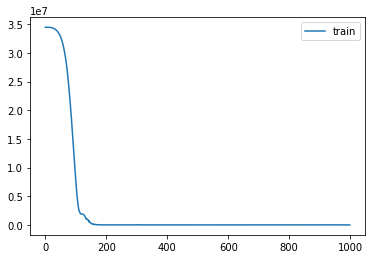

In [18]:
import matplotlib.pyplot as plt 
plt.plot(model_history.history['loss'], label="loss")
plt.legend(['train'], loc= "upper right")

In [19]:
X_test = np.array([104, 130]).reshape((1,1,2))
y_pred = model.predict(X_test, verbose=0)
print(X_test, y_pred)

[[[104 130]]] [[13299.591]]
